<a href="https://colab.research.google.com/github/ajou-y0uC4N/y0uC4N/blob/main/UAVCAN_type3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/univ_pri/UAVCAN/type3.csv')
'''
# 세션 유지 - 콘솔창 입력
function ConnectButton(){
    console.log("Connect pushed");
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click()
}
setInterval(ConnectButton,60000);
'''

Mounted at /content/gdrive


'\n# 세션 유지 - 콘솔창 입력\nfunction ConnectButton(){\n    console.log("Connect pushed");\n    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click()\n}\nsetInterval(ConnectButton,60000);\n'

In [ ]:
data.head()

,type,time,isCan0,priority,messageID,isService,serviceNODEID,byteSize,data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],7byteNullCnt,8byteNullCnt
0,Normal,0.000000,1,16,341,0,1,8,0,0,0,0,8,0,0,192,0,6
1,Normal,0.189037,1,16,20000,0,1,2,0,192,-1,-1,-1,-1,-1,-1,0,0
2,Normal,0.189207,1,31,1081,0,1,8,186,84,0,0,0,246,0,128,0,4
3,Normal,0.189377,1,31,1081,0,1,8,0,248,0,0,247,255,223,32,0,3
4,Normal,0.189514,1,31,1081,0,1,4,254,0,0,64,-1,-1,-1,-1,0,0


In [ ]:
y = data['type']
X = data.drop(columns =['type'])
X = X.drop(columns =['isCan0'])
X = X.drop(columns = ['time'])
data.isnull().sum()
y.unique()

array(['Normal', 'Attack'], dtype=object)

In [ ]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,priority,messageID,isService,serviceNODEID,byteSize,data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],7byteNullCnt,8byteNullCnt
priority,1.000000,0.119703,0.159460,0.793782,-0.184296,-0.146627,-0.075237,-0.096778,-0.003829,-0.141642,-0.137723,-0.270823,-0.001145,-0.132448,0.381523
messageID,0.119703,1.000000,-0.022095,-0.024104,-0.157013,0.049241,0.038107,-0.037430,-0.040826,-0.039743,-0.035024,-0.047207,-0.045290,-0.017971,-0.040772
isService,0.159460,-0.022095,1.000000,0.175568,0.005340,0.001816,-0.012862,0.002841,0.004780,-0.001105,0.004361,0.010585,-0.016486,-0.011257,-0.000315
serviceNODEID,0.793782,-0.024104,0.175568,1.000000,-0.162921,-0.194043,-0.069495,-0.133236,-0.080467,-0.192969,-0.164978,-0.311565,0.000920,-0.131658,0.436478
byteSize,-0.184296,-0.157013,0.005340,-0.162921,1.000000,-0.042242,0.187253,0.238315,0.207402,0.320545,0.270940,0.166147,0.550964,-0.080307,0.234430
data[0],-0.146627,0.049241,0.001816,-0.194043,-0.042242,1.000000,0.000028,0.001357,-0.008931,0.025426,0.020196,0.009712,0.015213,-0.099638,0.016284
data[1],-0.075237,0.038107,-0.012862,-0.069495,0.187253,0.000028,1.000000,-0.124474,0.057438,-0.120538,-0.095623,0.195782,-0.150253,0.280391,-0.162230
data[2],-0.096778,-0.037430,0.002841,-0.133236,0.238315,0.001357,-0.124474,1.000000,0.231881,0.436559,0.416242,0.065751,0.266514,-0.475738,-0.123970
data[3],-0.003829,-0.040826,0.004780,-0.080467,0.207402,-0.008931,0.057438,0.231881,1.000000,0.268702,0.387649,0.389184,-0.083579,-0.179592,-0.330926
data[4],-0.141642,-0.039743,-0.001105,-0.192969,0.320545,0.025426,-0.120538,0.436559,0.268702,1.000000,0.451451,0.078596,0.291982,-0.483201,-0.115740


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
param_grid = {
    'n_estimators' :[10], #[10, 25 ,50,100],
    'max_depth' : [5],#[5, 10 ,15 ,20],
    'min_samples_split':[15],#[2,5, 7,10,15],
    'min_samples_leaf':[2]#[1,2,4,8,16, 20]
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

###grid search random forest
#for train_idx, valid_idx in skfold.split(train_X, train_y):
  #x_train, x_valid = train_X[train_idx], train_X[valid_idx]
  #y_train, y_valid = train_y[train_idx], train_y[valid_idx]
skf = StratifiedKFold(n_splits=5, shuffle=True) # StratifiedKFold
clf = RandomForestClassifier(n_estimators = 10)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1, cv=skf)#cv=5)
grid_search.fit(X_train, y_train)

# 가장 성능이 좋은 model 추출
best_rf_model = grid_search.best_estimator_
y_pred1 = best_rf_model.predict(X_test)

# 가장 성능이 좋은 parameter
best_parameters =grid_search.best_params_
best_score = best_rf_model.score(X_test,y_test)

print(f"Best parameters: {best_parameters}")
print(f"Best score: {best_score}")
##Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 10}
##Best score: 0.9949244683921871

Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 10}
Best score: 0.9845807170346365


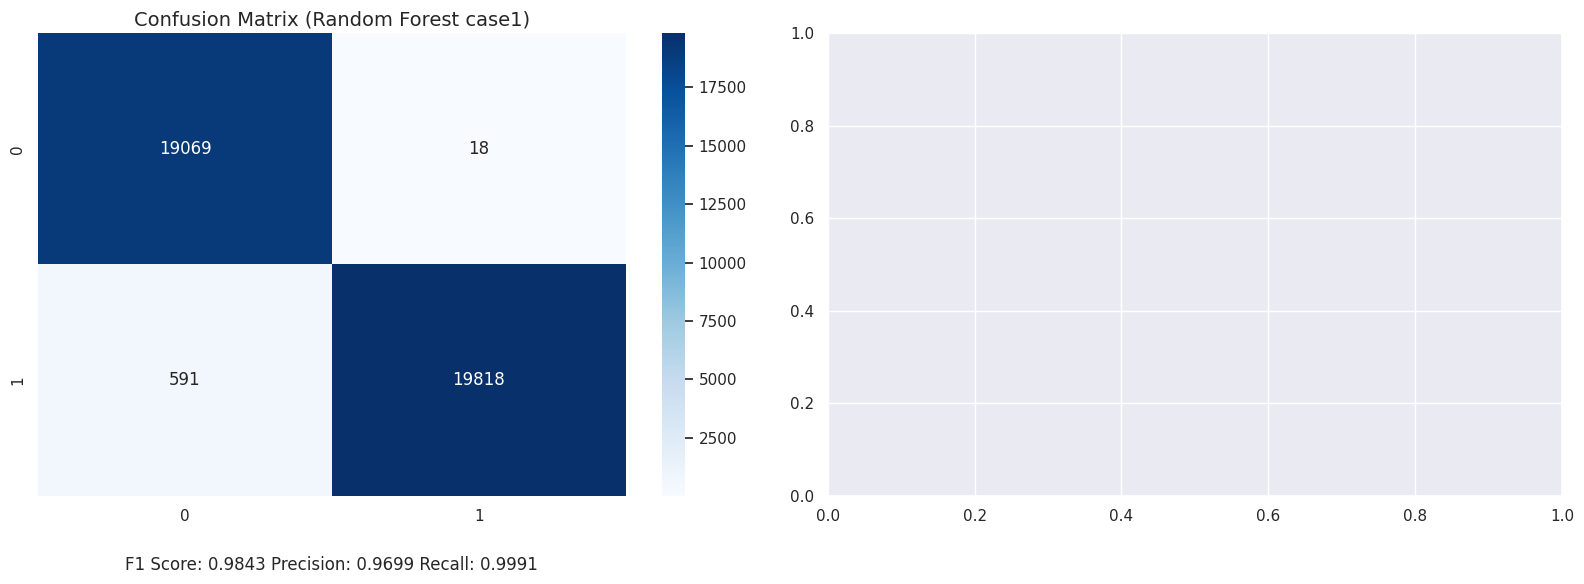

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# case1 model
cm1 = confusion_matrix(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1, pos_label="Attack")
precision_1 = precision_score(y_test, y_pred1, pos_label="Attack")
recall_1 = recall_score(y_test, y_pred1, pos_label="Attack")
#print(f1_1)

# 그래프 그리기
# 1행 2열의 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 첫 번째 subplot: baseline model
axes[0].set_title('Confusion Matrix (Random Forest case1)', fontsize=14)
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes,
             fontsize=12)

#heatmap
sns.heatmap(cm1,annot=True,fmt="d", cmap="Blues", ax=axes[0])

# subplot 간 간격 조절
plt.tight_layout()
plt.show()

In [ ]:
##### Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# 데이터 분할 (예시)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeClassifier 객체 생성
dt_classifier = DecisionTreeClassifier()

# 그리드 탐색을 위한 매개변수 그리드 정의
dt_param_grid = {
    'max_depth': [5],#[3, 5, 10, 15],
    'min_samples_split': [2],#[2, 5, 10],
    'min_samples_leaf': [1]#[1, 2, 4]
}

# StratifiedKFold를 사용하여 교차 검증 수행
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV 객체 생성 및 교차 검증 수행
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=skf, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 가장 성능이 좋은 모델 추출
best_dt_model = grid_search.best_estimator_

# 가장 성능이 좋은 매개변수 및 점수 출력
best_parameters = grid_search.best_params_
best_score = best_dt_model.score(X_test, y_test)

print(f"Best parameters: {best_parameters}")
print(f"Best score: {best_score}")
##Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
##Best score: 0.9875156355239103


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9839477415434474


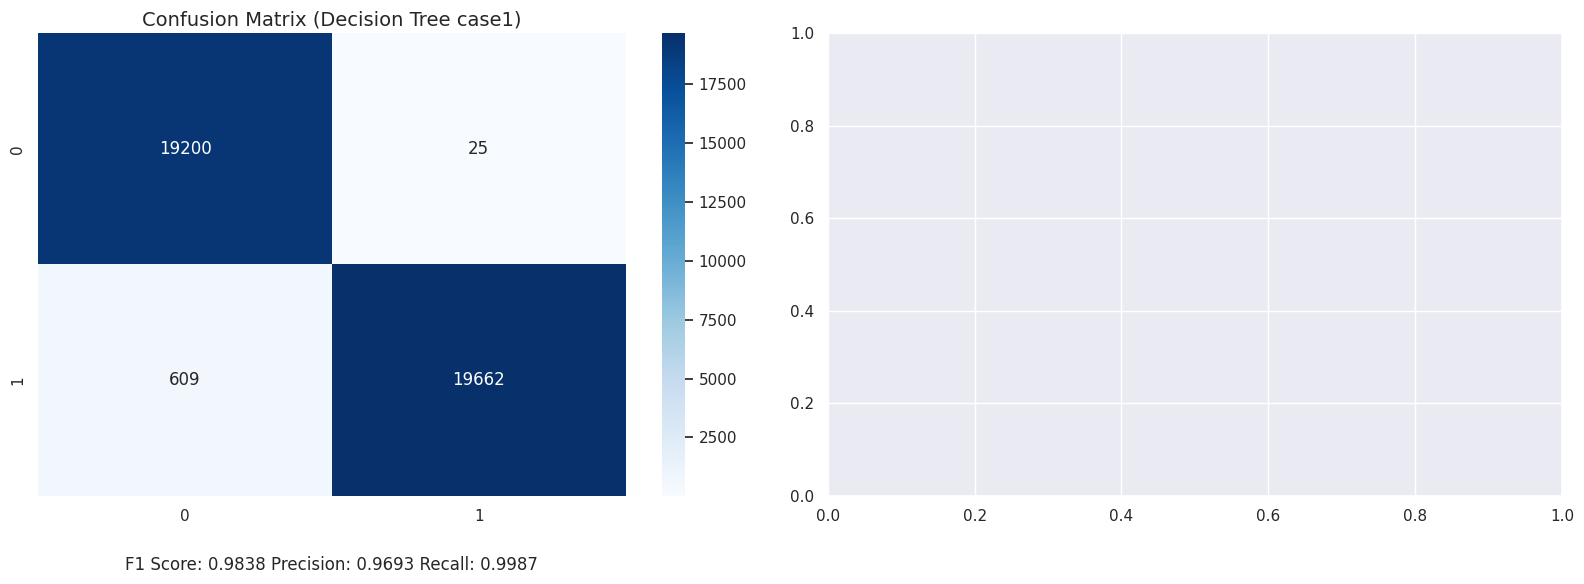

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# case1 model
dt_y_pred1 = best_dt_model.predict(X_test)

cm1 = confusion_matrix(y_test, dt_y_pred1)
f1_1 = f1_score(y_test, dt_y_pred1, pos_label="Attack")
precision_1 = precision_score(y_test, dt_y_pred1, pos_label="Attack")
recall_1 = recall_score(y_test, dt_y_pred1, pos_label="Attack")
#print(f1_1)

# 그래프 그리기
# 1행 2열의 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 첫 번째 subplot: baseline model
axes[0].set_title('Confusion Matrix (Decision Tree case1)', fontsize=14)
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes,
             fontsize=12)

#heatmap
sns.heatmap(cm1,annot=True,fmt="d", cmap="Blues", ax=axes[0])

# subplot 간 간격 조절
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = make_pipeline(StandardScaler(), LinearSVC(dual=True, random_state=0, tol=1e-5))
clf.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [ ]:
print(clf.named_steps['linearsvc'].coef_)

[[ 0.45398303 -0.00649745 -0.00513391  0.44689253 -0.4610097   0.02665988
  -0.00365443 -0.01294316 -0.30389005 -0.00585282  0.00877297 -0.13399622
   0.5681505   1.22960073  1.27838036]]
